1)  Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C).

Do the following
activities.

• What is the dimensionality of the vector space for this data?

• How many vectors exist in this vector space?

• What is the rank of Matrix A?

• Using Pseudo-Inverse find the cost of each product available for sale.

(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
pseudo-inverse.)

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/ML_PROJECT/Lab Session Data.xlsx'
purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')
print(purchase_data.head())

import numpy as np
A = purchase_data.iloc[:, :-1].apply(pd.to_numeric, errors='coerce').fillna(0).values
C = pd.to_numeric(purchase_data.iloc[:, -1], errors='coerce').fillna(0).values

valid_rows = ~np.isnan(A).any(axis=1) & ~np.isnan(C)
A = A[valid_rows]
C = C[valid_rows]

print("Matrix A:")
print(A)
print("Matrix C:")
print(C)

dimensionality = A.shape[1]
print(f"Dimensionality of the vector space: {dimensionality}")

num_vectors = A.shape[0]
print(f"Number of vectors in the vector space: {num_vectors}")

rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")

A_pseudo_inv = np.linalg.pinv(A)
X = np.dot(A_pseudo_inv, C)
print("Cost of each product:")
print(X)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
Matrix A:
[[ 0. 20.  6.  2.]
 [ 0. 16.  3.  6.]
 [ 0. 27.  6.  2.]
 [ 0. 19.  1.  2.]
 [ 0. 24.  4.  2.]
 [ 0. 22.  1.  5.]
 [ 0. 15.  4.  2.]
 [ 0. 18.  4.  2.]
 [ 0. 21.  1.  4.]
 [ 0. 16.  2.  4.]]
Matrix C:
[386 289 393 110 280 167 271 274 148 198]
Dimensionality of the vector space: 4
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product:
[ 0.  1. 55. 18.]


2)  Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.

In [ ]:
print("Cost of each product (Model Vector X):")
print(X)

C_predicted = np.dot(A, X)
print("\nActual Costs (C):", C)
print("Predicted Costs (C_predicted):", C_predicted)

Cost of each product (Model Vector X):
[ 0.  1. 55. 18.]

Actual Costs (C): [386 289 393 110 280 167 271 274 148 198]
Predicted Costs (C_predicted): [386. 289. 393. 110. 280. 167. 271. 274. 148. 198.]


3) Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

purchase_data['Class'] = purchase_data['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
X = purchase_data.iloc[:, 1:-2]
y = purchase_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

        POOR       0.00      0.00      0.00         1
        RICH       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4) Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.
• Calculate the mean and variance of the Price data present in column D.  
(Suggestion: if you use Python, you may use statistics.mean() &
statistics.variance() methods).
• Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.
• Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.
• From the Chg% (available in column I) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)
• Calculate the probability of making a profit on Wednesday.
• Calculate the conditional probability of making profit, given that today is Wednesday.
• Make a scatter plot of Chg% data against the day of the week

Mean of Price data: 1560.663453815261
Variance of Price data: 58732.365352539186

Sample mean for Wednesdays: 1550.706
Population mean: 1560.663453815261
Difference: -9.957453815261033

Sample mean for April: 1698.9526315789474
Population mean: 1560.663453815261
Difference: 138.28917776368644

Probability of making a loss: 0.4979919678714859

Probability of making a profit on Wednesday: 0.42

Conditional probability of making a profit given that today is Wednesday: 0.42


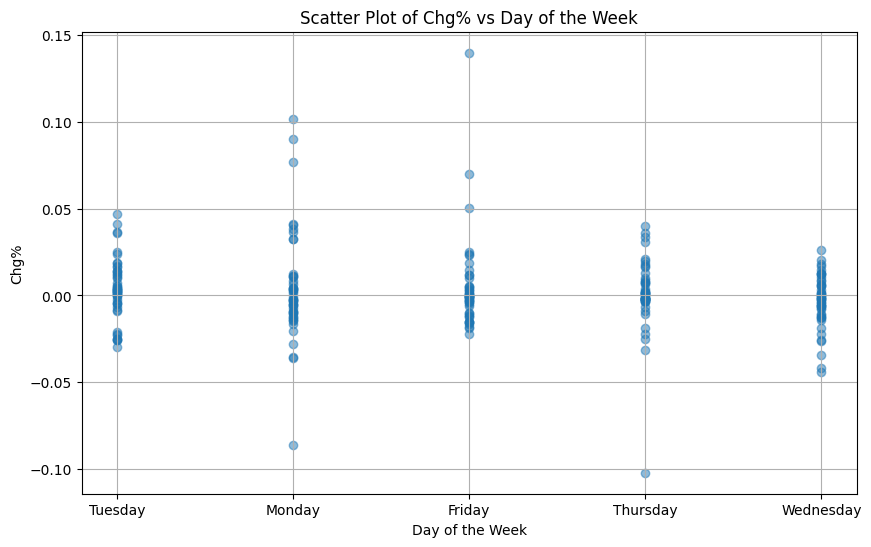

In [ ]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

irctc_data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
irctc_data['Date'] = pd.to_datetime(irctc_data['Date'])

price_data = irctc_data['Price']

mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

print("Mean of Price data:", mean_price)
print("Variance of Price data:", variance_price)

wednesday_data = irctc_data[irctc_data['Date'].dt.day_name() == 'Wednesday']

wednesday_mean = statistics.mean(wednesday_data['Price'])

print("\nSample mean for Wednesdays:", wednesday_mean)
print("Population mean:", mean_price)
print("Difference:", wednesday_mean - mean_price)

april_data = irctc_data[irctc_data['Date'].dt.month == 4]

april_mean = statistics.mean(april_data['Price'])

print("\nSample mean for April:", april_mean)
print("Population mean:", mean_price)
print("Difference:", april_mean - mean_price)

chg_data = irctc_data['Chg%']

probability_loss = len(chg_data[chg_data < 0]) / len(chg_data)

print("\nProbability of making a loss:", probability_loss)

wednesday_chg_data = wednesday_data['Chg%']

probability_profit_wednesday = len(wednesday_chg_data[wednesday_chg_data > 0]) / len(wednesday_chg_data)

print("\nProbability of making a profit on Wednesday:", probability_profit_wednesday)

total_wednesdays = len(wednesday_data)

profit_wednesdays = len(wednesday_data[wednesday_data['Chg%'] > 0])

conditional_probability = profit_wednesdays / total_wednesdays

print("\nConditional probability of making a profit given that today is Wednesday:", conditional_probability)

irctc_data['Day'] = irctc_data['Date'].dt.day_name()

plt.figure(figsize=(10, 6))
plt.scatter(irctc_data['Day'], irctc_data['Chg%'], alpha=0.5)
plt.title('Scatter Plot of Chg% vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.grid(True)
plt.show()

5)  Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
following tasks:
• Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute.
• For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).
• Study the data range for numeric variables.
• Study the presence of missing values in each attribute.
• Study presence of outliers in data.  
• For numeric variables, calculate the mean and variance (or standard deviation).

In [ ]:
import pandas as pd
!pip install openpyxl

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML_PROJECT/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
print(df.info())
print(df.head())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Attributes:", categorical_cols)

from sklearn.preprocessing import LabelEncoder
refSrc_order = {"other": 0, "SVI": 1, "SVHC": 2, "SVHD": 3,"STMW": 4}
df["referral source"] = df["referral source"].map(refSrc_order)
print(df.head(15))

Categorical Attributes: Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
    Record ID  age sex on thyroxine query on thyroxine  \
0   840801013   29   F            f                  f   
1   840801014   29   F            f                  f   
2   840801042   41   F            f                  f   
3   840803046   36   F            f                  f   
4   840803047   32   F            f                  f   
5   840803048   60   F            f                  f   
6   840803068   77   F            f                  f   
7   840807019   28   F            f       

In [ ]:
nominal_cols = [col for col in categorical_cols if col not in refSrc_order]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print(df.head())

   Record ID  age  sex_F  sex_M  on thyroxine_t  query on thyroxine_t  \
0  840801013   29   True  False           False                 False   
1  840801014   29   True  False           False                 False   
2  840801042   41   True  False           False                 False   
3  840803046   36   True  False           False                 False   
4  840803047   32   True  False           False                 False   

   on antithyroid medication_t  sick_t  pregnant_t  thyroid surgery_t  ...  \
0                        False   False       False              False  ...   
1                        False   False       False              False  ...   
2                        False   False       False              False  ...   
3                        False   False       False              False  ...   
4                        False   False       False              False  ...   

   Condition_MI  Condition_MK  Condition_N  Condition_NO CONDITION  \
0         False       

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
print("Range of Numeric Variables:")
print(numeric_cols.agg(['min', 'max']))
# check row = 8107

Range of Numeric Variables:
     Record ID    age
min  840801013      1
max  870119035  65526


In [ ]:
print(df.isnull().sum())

Record ID         0
age               0
sex_F             0
sex_M             0
on thyroxine_t    0
                 ..
Condition_OI      0
Condition_P       0
Condition_Q       0
Condition_R       0
Condition_S       0
Length: 1365, dtype: int64


outlier detection: 


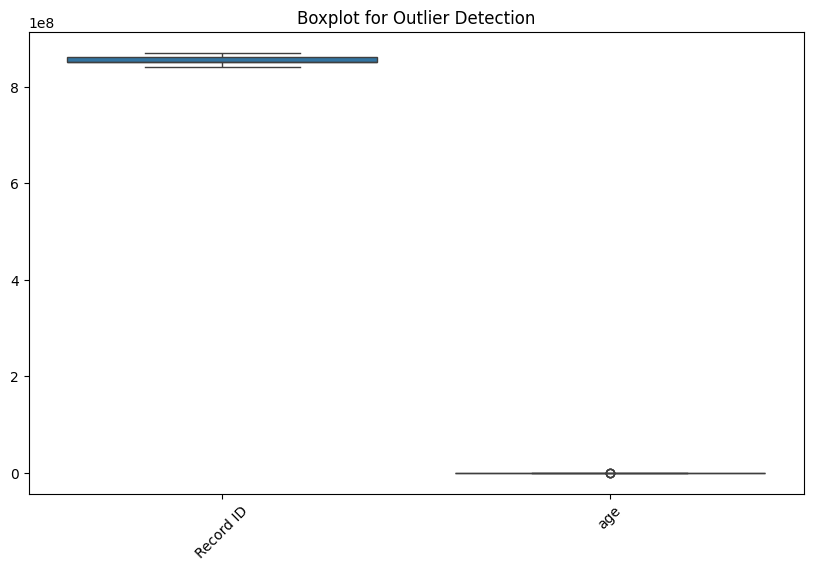

In [ ]:
print("outlier detection: ")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
#  Calculate Mean & Variance (or Standard Deviation)
print("Mean of Numeric Variables:")
print(numeric_cols.mean())

print("\nVariance of Numeric Variables:")
print(numeric_cols.var())

print("\nStandard Deviation of Numeric Variables:")
print(numeric_cols.std())

Mean of Numeric Variables:
Record ID    8.529473e+08
age          7.355582e+01
dtype: float64

Variance of Numeric Variables:
Record ID    5.748625e+13
age          1.401801e+06
dtype: float64

Standard Deviation of Numeric Variables:
Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


6)  Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance.

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


In [ ]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count() > 0

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_cols = [col for col in numeric_cols if has_outliers(df[col].dropna())]

print("Numeric Columns with Outliers:", outlier_cols)
print("Numeric Columns without Outliers:", list(set(numeric_cols) - set(outlier_cols)))

Numeric Columns with Outliers: ['age']
Numeric Columns without Outliers: ['Record ID']


In [ ]:
for col in set(numeric_cols) - set(outlier_cols):
    df[col].fillna(df[col].mean(), inplace=True)

for col in outlier_cols:
    df[col].fillna(df[col].median(), inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Record ID         0
age               0
sex_F             0
sex_M             0
on thyroxine_t    0
                 ..
Condition_OI      0
Condition_P       0
Condition_Q       0
Condition_R       0
Condition_S       0
Length: 1365, dtype: int64


<ipython-input-22-81c3e345fb99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-22-81c3e345fb99>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

7)  Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
print("Range of Numeric Variables:")
print(numeric_cols.agg(['min', 'max']))

Range of Numeric Variables:
     Record ID    age
min  840801013      1
max  870119035  65526


In [ ]:
df_scaled = df.copy()
for col in numeric_cols:
    if has_outliers(df[col]):
        df_scaled[col] = RobustScaler().fit_transform(df[[col]])
    else:
        df_scaled[col] = MinMaxScaler().fit_transform(df[[col]])

print(df_scaled.head())

      Record ID       age  sex_F  sex_M  on thyroxine_t  query on thyroxine_t  \
0  0.000000e+00 -0.838710   True  False           False                 False   
1  3.410871e-08 -0.838710   True  False           False                 False   
2  9.891527e-07 -0.451613   True  False           False                 False   
3  6.934301e-05 -0.612903   True  False           False                 False   
4  6.937712e-05 -0.741935   True  False           False                 False   

   on antithyroid medication_t  sick_t  pregnant_t  thyroid surgery_t  ...  \
0                        False   False       False              False  ...   
1                        False   False       False              False  ...   
2                        False   False       False              False  ...   
3                        False   False       False              False  ...   
4                        False   False       False              False  ...   

   Condition_MI  Condition_MK  Condition_N  

8) Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them.

In [ ]:
binary_cols = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]

vec1 = df.loc[0, binary_cols].values
vec2 = df.loc[1, binary_cols].values

print("Binary Attributes:", binary_cols)
print("First Vector:", vec1)
print("Second Vector:", vec2)

Binary Attributes: ['sex_F', 'sex_M', 'on thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t', 'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH measured_t', 'TSH_0.01', 'TSH_0.015', 'TSH_0.02', 'TSH_0.025', 'TSH_0.03', 'TSH_0.035', 'TSH_0.04', 'TSH_0.045', 'TSH_0.05', 'TSH_0.055', 'TSH_0.06', 'TSH_0.065', 'TSH_0.07', 'TSH_0.075', 'TSH_0.08', 'TSH_0.085', 'TSH_0.09', 'TSH_0.095', 'TSH_0.1', 'TSH_0.105', 'TSH_0.11', 'TSH_0.115', 'TSH_0.12', 'TSH_0.125', 'TSH_0.13', 'TSH_0.135', 'TSH_0.14', 'TSH_0.15', 'TSH_0.16', 'TSH_0.17', 'TSH_0.18', 'TSH_0.19', 'TSH_0.2', 'TSH_0.21', 'TSH_0.22', 'TSH_0.23', 'TSH_0.24', 'TSH_0.25', 'TSH_0.255', 'TSH_0.26', 'TSH_0.27', 'TSH_0.28', 'TSH_0.29', 'TSH_0.3', 'TSH_0.31', 'TSH_0.32', 'TSH_0.33', 'TSH_0.34', 'TSH_0.35', 'TSH_0.36', 'TSH_0.37', 'TSH_0.38', 'TSH_0.39', 'TSH_0.4', 'TSH_0.41', 'TSH_0.42', 'TSH_0.43',

In [ ]:
import numpy as np
intersection = np.sum((vec1 == 1) & (vec2 == 1))
union = np.sum((vec1 == 1) | (vec2 == 1))
jaccard_coeff = intersection / union if union != 0 else 0

print(f"Jaccard Coefficient (JC): {jaccard_coeff:.4f}")

intersection = np.sum((vec1 == vec2))
total_attributes = len(vec1)
smc = intersection / total_attributes if total_attributes != 0 else 0

print(f"Simple Matching Coefficient (SMC): {smc:.4f}")

Jaccard Coefficient (JC): 0.4000
Simple Matching Coefficient (SMC): 0.9934


9) Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

vec1 = df.iloc[0].values.reshape(1, -1)
vec2 = df.iloc[1].values.reshape(1, -1)

cos_sim = cosine_similarity(vec1, vec2)[0][0]

print(f"Cosine Similarity: {cos_sim:.4f}")

Cosine Similarity: 1.0000


10) Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.  



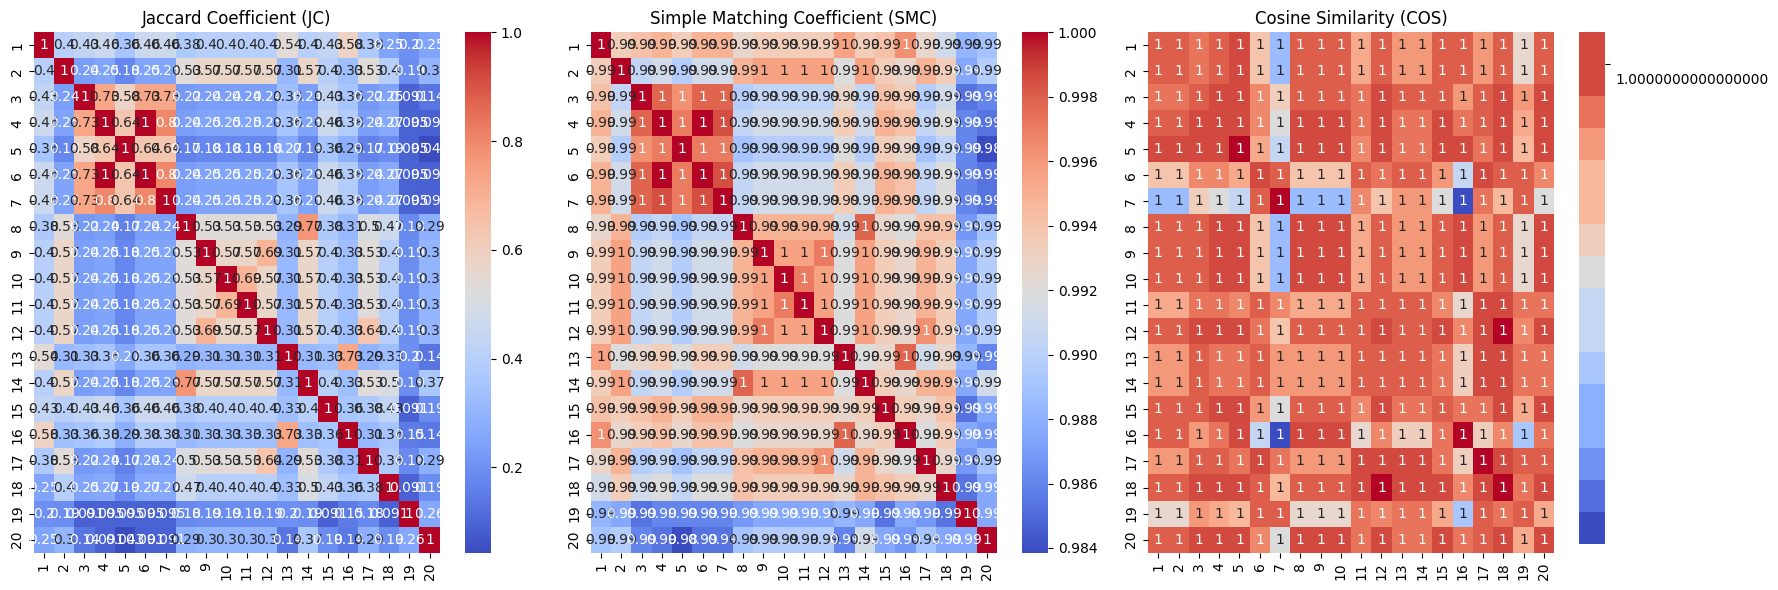

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

df_subset = df.iloc[:20]
binary_cols = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
df_binary = df_subset[binary_cols].astype(int)

df_values = df_subset.to_numpy()

jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = cosine_similarity(df_values)

def compute_jc_smc(vec1, vec2):
    intersection = np.sum((vec1 == 1) & (vec2 == 1))
    union = np.sum((vec1 == 1) | (vec2 == 1))
    matches = np.sum(vec1 == vec2)
    total_attributes = len(vec1)

    jc = intersection / union if union != 0 else 0
    smc = matches / total_attributes
    return jc, smc

for i in range(20):
    for j in range(20):
        jc_matrix[i, j], smc_matrix[i, j] = compute_jc_smc(df_binary.iloc[i].values, df_binary.iloc[j].values)

jc_df = pd.DataFrame(jc_matrix, index=range(1, 21), columns=range(1, 21))
smc_df = pd.DataFrame(smc_matrix, index=range(1, 21), columns=range(1, 21))
cos_df = pd.DataFrame(cos_matrix, index=range(1, 21), columns=range(1, 21))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(jc_df, ax=axes[0], cmap="coolwarm", annot=True)
axes[0].set_title("Jaccard Coefficient (JC)")

sns.heatmap(smc_df, ax=axes[1], cmap="coolwarm", annot=True)
axes[1].set_title("Simple Matching Coefficient (SMC)")

sns.heatmap(cos_df, ax=axes[2], cmap="coolwarm", annot=True)
axes[2].set_title("Cosine Similarity (COS)")

plt.tight_layout()
plt.show()